In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm

In [47]:
def avg_distance(freq_list):
    total_distance = 0
    for freq in freq_list:
        for i in range(1, np.size(freq)):
            total_distance += abs(freq[i] - freq[i-1])**2
    return total_distance / (freq_list.shape[0] * freq_list.shape[1])

def filter_seed(traces_list, high_freq_list, threshold = 1):
    accepted = 0
    rejected = 0
    for i in range(np.size(high_freq_list, axis=0)):
        percentiles = (0.1, 99.9)
        high_freq_peak_to_peak = np.percentile(high_freq_list[i], percentiles[1]) - np.percentile(high_freq_list[i], percentiles[0])
        original_trace_peak_to_peak = np.percentile(traces_list[i], percentiles[1]) - np.percentile(traces_list[i], percentiles[0])
        pnr = original_trace_peak_to_peak / high_freq_peak_to_peak
        if pnr > 1:
            accepted += 1
        else:
            rejected += 1
    return accepted, rejected

def ks(high_freq_list):
    total_ks = 0
    for freqs in high_freq_list:
        mean = np.mean(freqs)
        std = np.std(freqs)
        kstatistic = 0
        if std != 0:
            kstatistic = kstest(freqs, 'norm', args=(mean, std))[0]
        total_ks += kstatistic
    return total_ks / np.size(high_freq_list, axis=0)



In [5]:
freqs_list = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5]

In [6]:
low_freqs_all_001 = np.load(f'/hpc/mzhu843/image-processing/minian/results/experiment5/seed generation/trace_smth_low_all 0.01.npy')
high_freqs_all_001 = np.load(f'/hpc/mzhu843/image-processing/minian/results/experiment5/seed generation/trace_smth_high_all 0.01.npy')

low_freqs_all_002 = np.load(f'/hpc/mzhu843/image-processing/minian/results/experiment5/seed generation/trace_smth_low_all 0.02.npy')
high_freqs_all_002 = np.load(f'/hpc/mzhu843/image-processing/minian/results/experiment5/seed generation/trace_smth_high_all 0.02.npy')

low_freqs_all_005 = np.load(f'/hpc/mzhu843/image-processing/minian/results/experiment5/seed generation/trace_smth_low_all 0.05.npy')
high_freqs_all_005 = np.load(f'/hpc/mzhu843/image-processing/minian/results/experiment5/seed generation/trace_smth_high_all 0.05.npy')

low_freqs_all_01 = np.load(f'/hpc/mzhu843/image-processing/minian/results/experiment5/seed generation/trace_smth_low_all 0.1.npy')
high_freqs_all_01 = np.load(f'/hpc/mzhu843/image-processing/minian/results/experiment5/seed generation/trace_smth_high_all 0.1.npy')

low_freqs_all_02 = np.load(f'/hpc/mzhu843/image-processing/minian/results/experiment5/seed generation/trace_smth_low_all 0.2.npy')
high_freqs_all_02 = np.load(f'/hpc/mzhu843/image-processing/minian/results/experiment5/seed generation/trace_smth_high_all 0.2.npy')

low_freqs_all_05 = np.load(f'/hpc/mzhu843/image-processing/minian/results/experiment5/seed generation/trace_smth_low_all 0.5.npy')
high_freqs_all_05 = np.load(f'/hpc/mzhu843/image-processing/minian/results/experiment5/seed generation/trace_smth_high_all 0.5.npy')


In [135]:
original_traces = np.load(f'/hpc/mzhu843/image-processing/minian/results/experiment5/seed generation/trace_smth_all.npy')

In [7]:
low_freqs = [low_freqs_all_001, low_freqs_all_002, low_freqs_all_005, low_freqs_all_01, low_freqs_all_02, low_freqs_all_05]
high_freqs = [high_freqs_all_001, high_freqs_all_002, high_freqs_all_005, high_freqs_all_01, high_freqs_all_02, high_freqs_all_05]

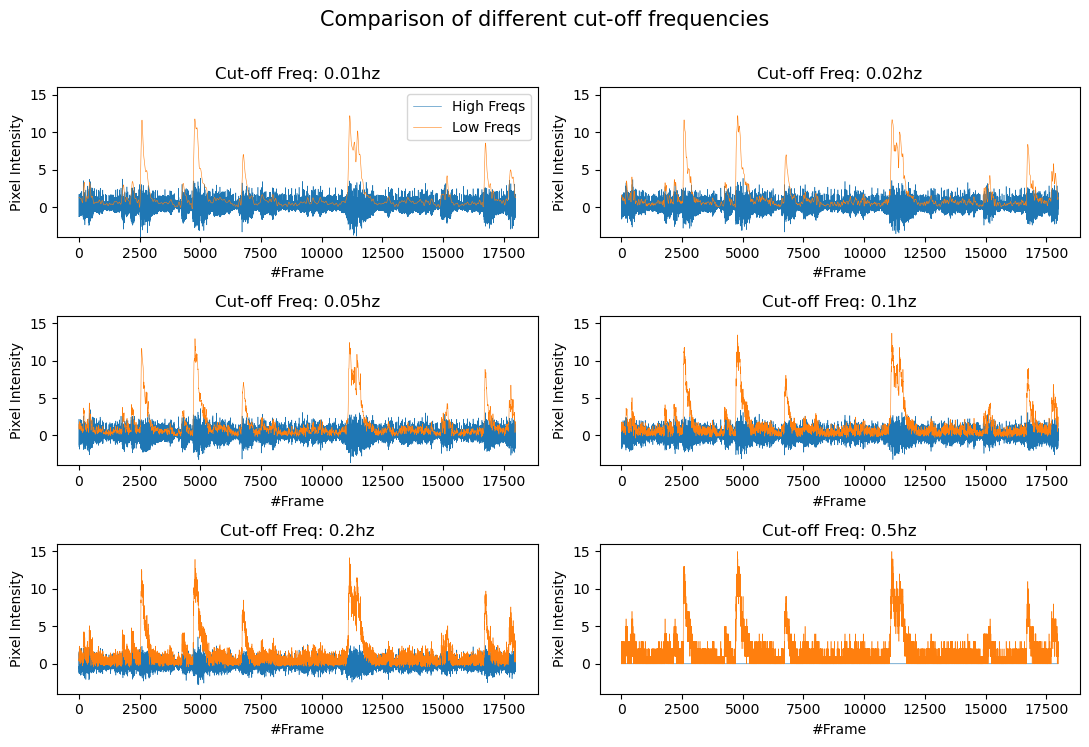

In [67]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 7))

for i in range(6):
    # Calculate the row and column indices for the subplot
    row_index = i // 2
    col_index = i % 2

    # Plot high_freqs and low_freqs on the subplot
    ax = axes[row_index, col_index]

    ax.plot(high_freqs[i][14], label='High Freqs', linewidth=0.4)  # Adjust linewidth as needed
    ax.plot(low_freqs[i][14], label='Low Freqs', linewidth=0.4)    # Adjust linewidth as needed

    # Set the y-axis limit
    ax.set_ylim(-4, 16)

    # Set the title to the corresponding frequency from freq_list
    ax.set_title(f'Cut-off Freq: {freqs_list[i]}hz')

    # Add labels to the axes
    ax.set_xlabel('#Frame')
    ax.set_ylabel('Pixel Intensity')

    # Add a legend only to the top right subplot
    if i == 0:
        ax.legend()

# Adjust the layout to prevent overlap
plt.tight_layout()

fig.suptitle('Comparison of different cut-off frequencies', fontsize=15, y =1.06)

# Show the plot
plt.show()

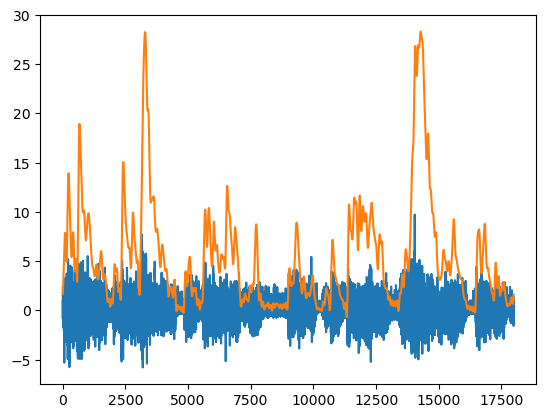

In [108]:
#Indices: 1, 2, 9, 14, 25

In [54]:
for i in range(np.size(freqs_list)):
    # chosen_seeds = np.array([high_freqs[i][1], high_freqs[i][2], high_freqs[i][9], high_freqs[i][14], high_freqs[i][25]])

    print(freqs_list[i])
    print(avg_distance(low_freqs[i]))
    print()

0.5
0.00014839331520624015



In [56]:
for i in range(np.size(freqs_list)):
    print(freqs_list[i])
    print(ks(high_freqs[i]))
    print()

0.01
0.07589431682082336

0.02
0.07185937620876225

0.05
0.061543200705535914

0.1
0.05037498654375133

0.2
0.036032130529800276

0.5
0.3400651954056043

